# Lab Quiz

- Rename this file as StudentName_StudentID.ipynb, where StudentName is your full name and StudentID is your matriculation number. 
- Write your code in the code cells or boxes. Do not create extra cells for Problem 1,2 and 3. You can create extra cells for Problem 4 if need be.
- Below each Comment of a Problem, write your answer to that Comment. 

### Preparation

What do you need to prepare/import? Insert your code below.  

In [31]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [32]:
winesData = pd.read_csv('quizData_SetU.csv')
winesData.head()

,CitricAcid,Chlorides,Sulphates,Alcohol
0,0.49,0.105,0.63,Low
1,0.38,0.169,0.65,Low
2,0.40,0.056,0.87,Low
3,0.50,0.103,0.75,Low
4,0.66,0.074,0.57,Low


---

## Problems

### Problem 1a

Print the overall statistical description.

In [33]:
winesData.describe()

,CitricAcid,Chlorides,Sulphates
count,1000.000000,1000.000000,1000.000000
mean,0.272160,0.082495,0.662830
std,0.194516,0.030140,0.178389
min,0.000000,0.012000,0.370000
25%,0.097500,0.070000,0.550000
50%,0.250000,0.079000,0.620000
75%,0.420000,0.091000,0.730000
max,1.000000,0.611000,2.000000


In [34]:
CitricAcid = pd.DataFrame(winesData['CitricAcid'])
Chlorides = pd.DataFrame(winesData['Chlorides'])
Sulphates = pd.DataFrame(winesData['Sulphates'])

Plot standard statistical distributions for each variable.

<Axes: >

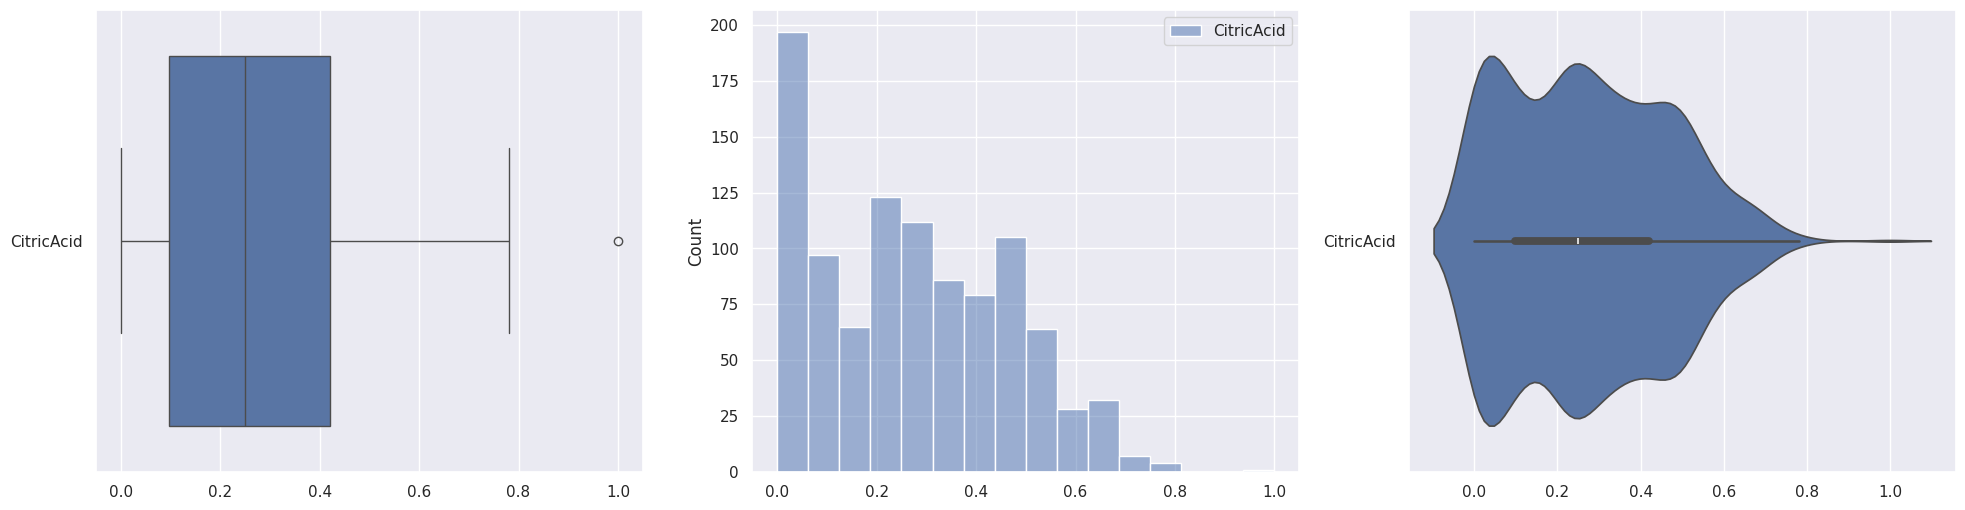

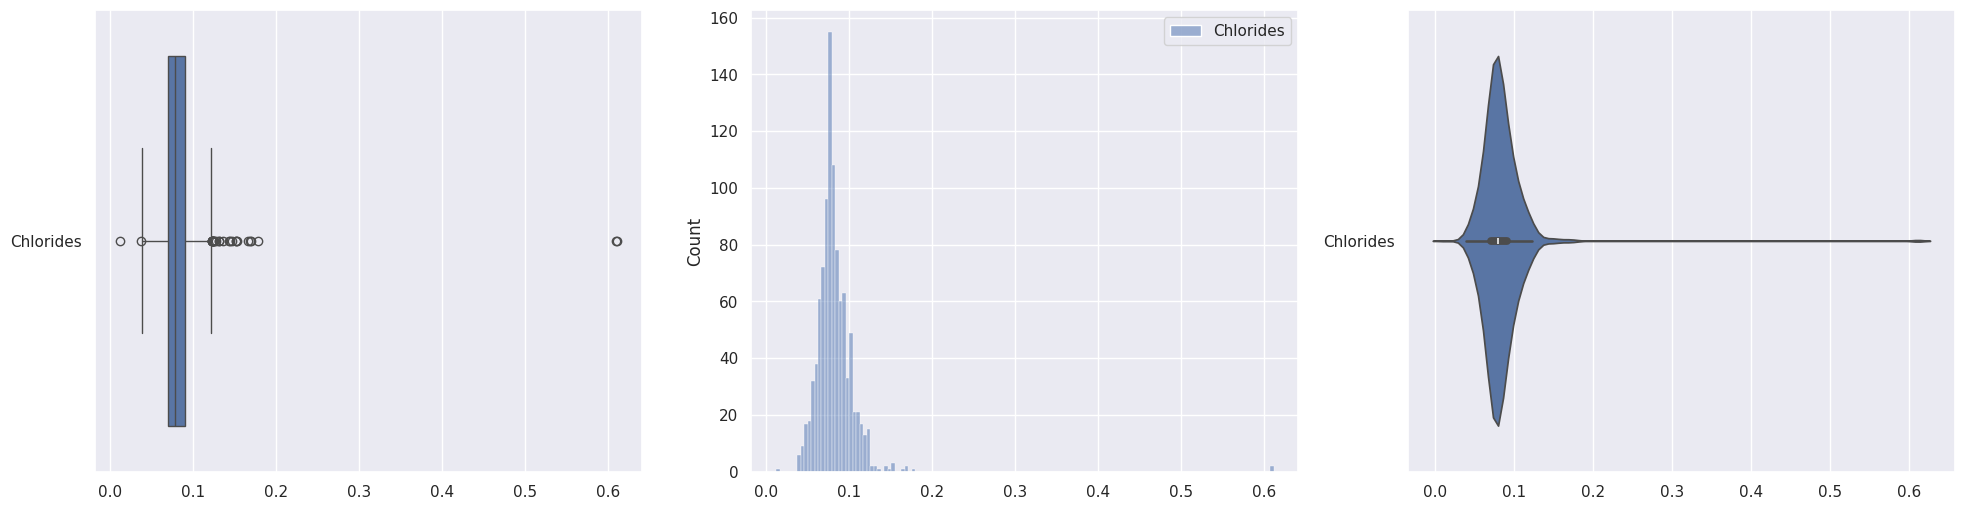

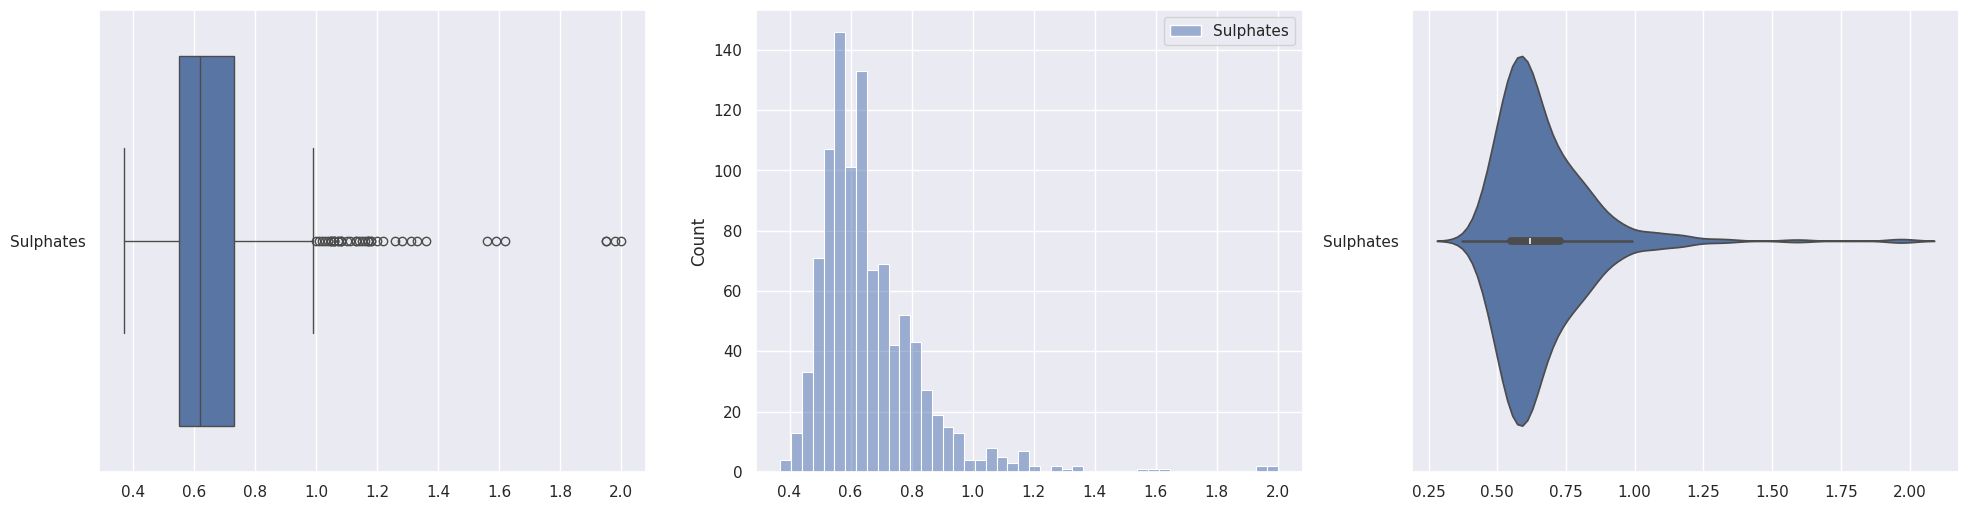

In [35]:
# Plot the distributions of Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = CitricAcid, orient = "h", ax = axes[0])
sb.histplot(data = CitricAcid, ax = axes[1])
sb.violinplot(data = CitricAcid, orient = "h", ax = axes[2])

# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = Chlorides, orient = "h", ax = axes[0])
sb.histplot(data = Chlorides, ax = axes[1])
sb.violinplot(data = Chlorides, orient = "h", ax = axes[2])

# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = Sulphates, orient = "h", ax = axes[0])
sb.histplot(data = Sulphates, ax = axes[1])
sb.violinplot(data = Sulphates, orient = "h", ax = axes[2])

In [36]:
# Summary Statistics for Legendary Train
winesData["Alcohol"].value_counts()

Alcohol
High    521
Low     479
Name: count, dtype: int64

Comment : Which numeric variable has the most number of outliers?

Answer: Sulphates

Comment : What is the ratio of “Low:High”?

Answer: 479:521

### Problem 1b

Visualize the relationship amongst the response and all other numeric variables using mutual boxplots. 

<Axes: xlabel='CitricAcid', ylabel='Alcohol'>

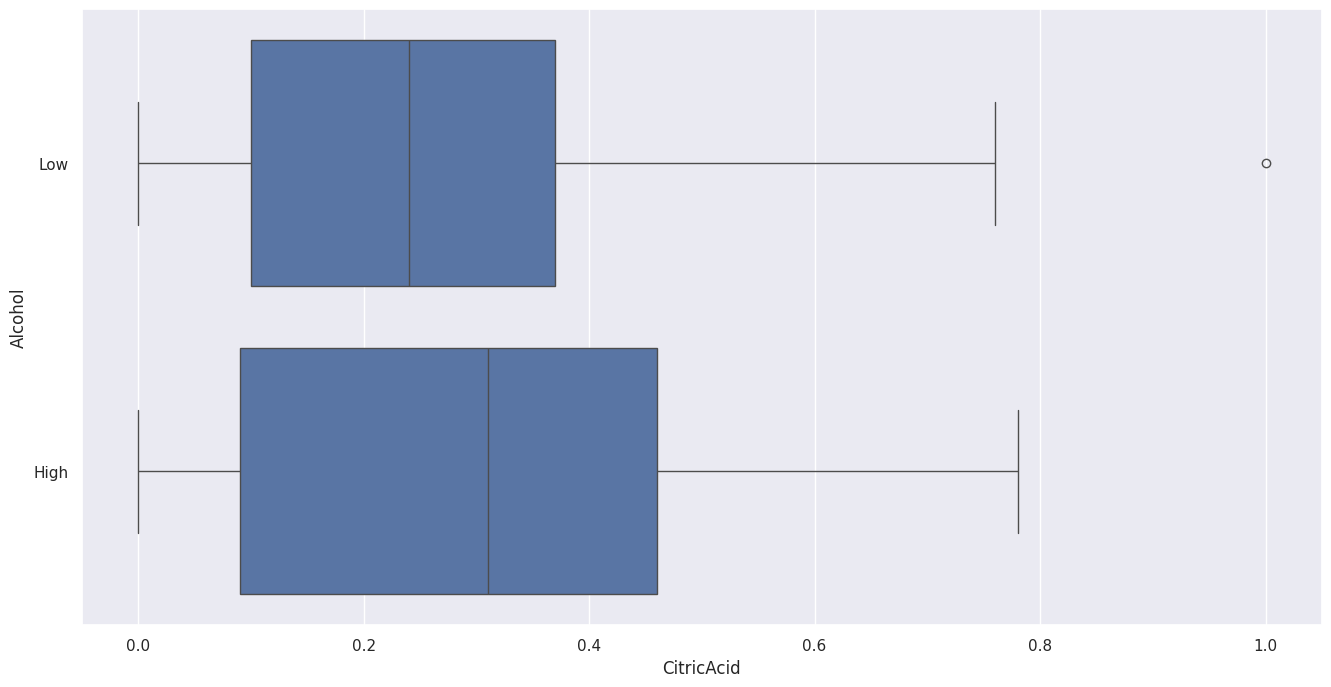

In [37]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'CitricAcid', y = 'Alcohol', data = winesData)

<Axes: xlabel='Chlorides', ylabel='Alcohol'>

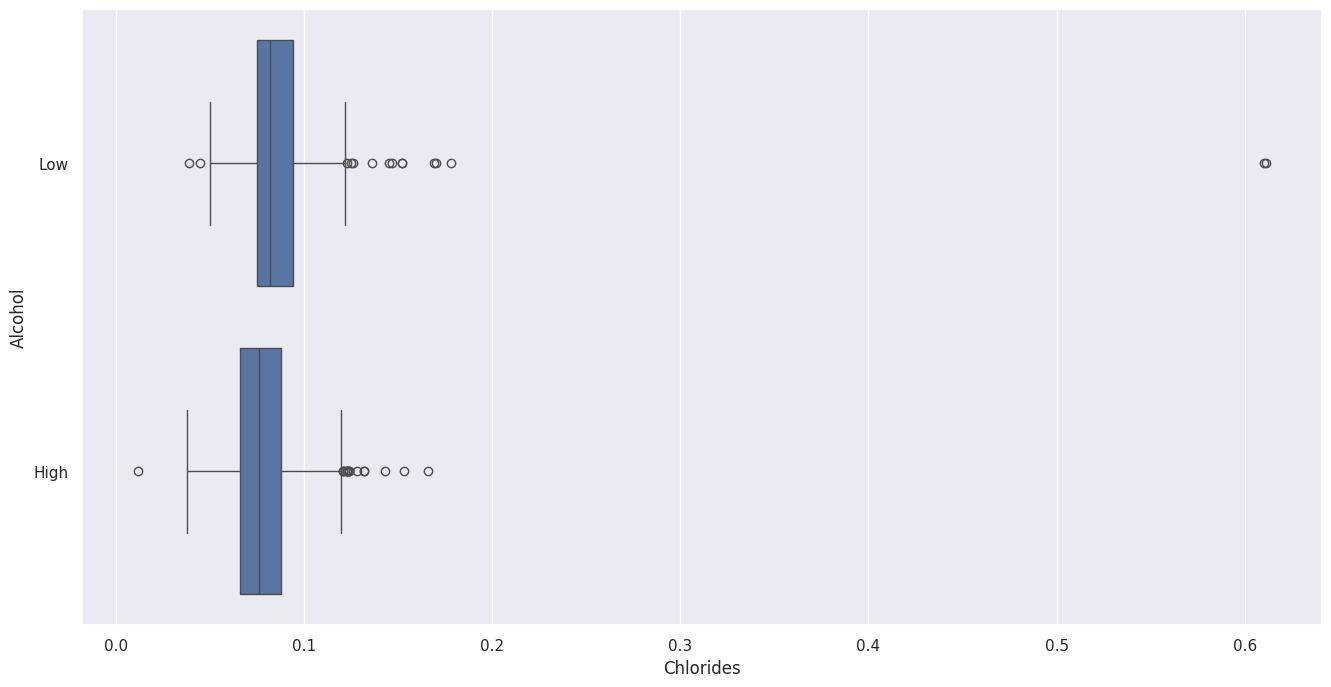

In [38]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Chlorides', y = 'Alcohol', data = winesData)

<Axes: xlabel='Sulphates', ylabel='Alcohol'>

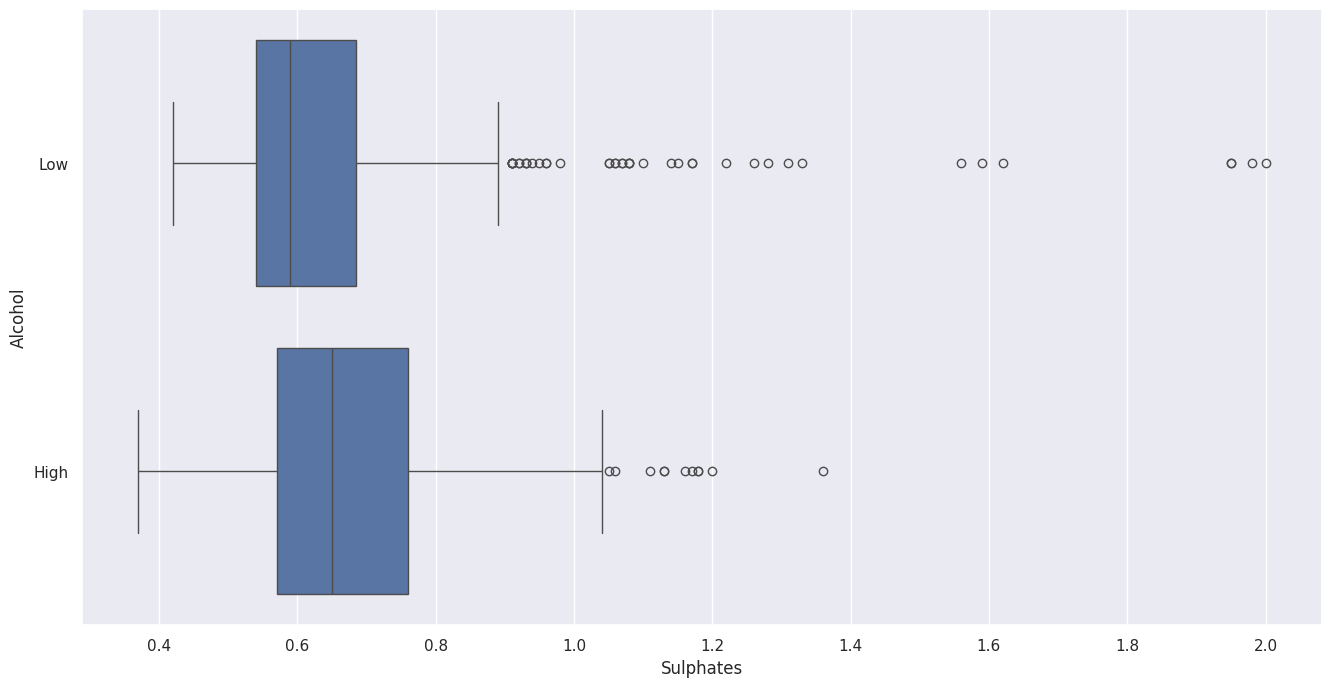

In [39]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Sulphates', y = 'Alcohol', data = winesData)

Comment : Which of the three numeric variables is the most important in prediction? Briefly justify.

Answer: CriticAcid. The box plot is similar with (spread) almost same length of whiskers and only 1 outlier point.

### Problem 2a

Partition the dataset randomly into Train and Test datasets.

In [40]:
# Extract Response and Predictors
y = pd.DataFrame(winesData["Alcohol"])
X = pd.DataFrame(winesData[["CitricAcid", "Chlorides", "Sulphates"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (800, 1) (800, 3)
Test Set  : (200, 1) (200, 3)


On the Train set, fit three uni-variate Decision Tree models for the response against each of the three numeric variables. For each such tree model, print the classification accuracy of the model you fit, and visualize the tree. 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.61



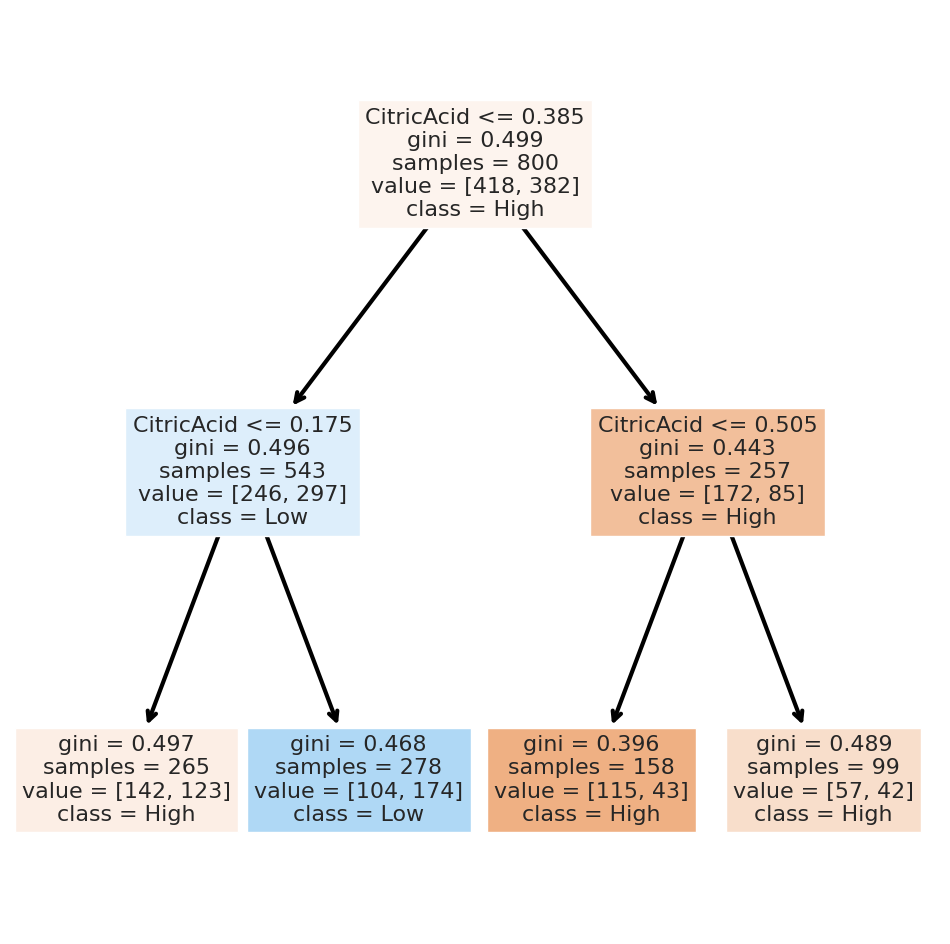

In [41]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train[['CitricAcid']], y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train[['CitricAcid']])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train[['CitricAcid']], y_train))
print()

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train[['CitricAcid']].columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6225



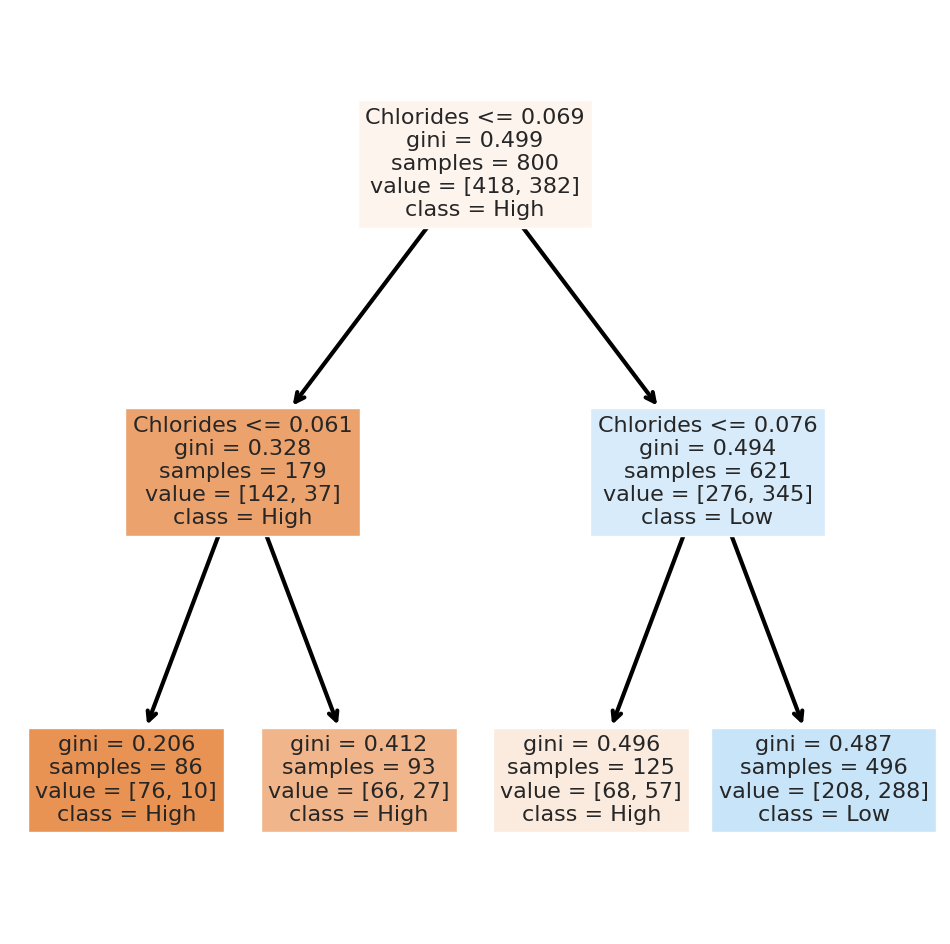

In [42]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train[['Chlorides']], y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train[['Chlorides']])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train[['Chlorides']], y_train))
print()

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train[['Chlorides']].columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.615



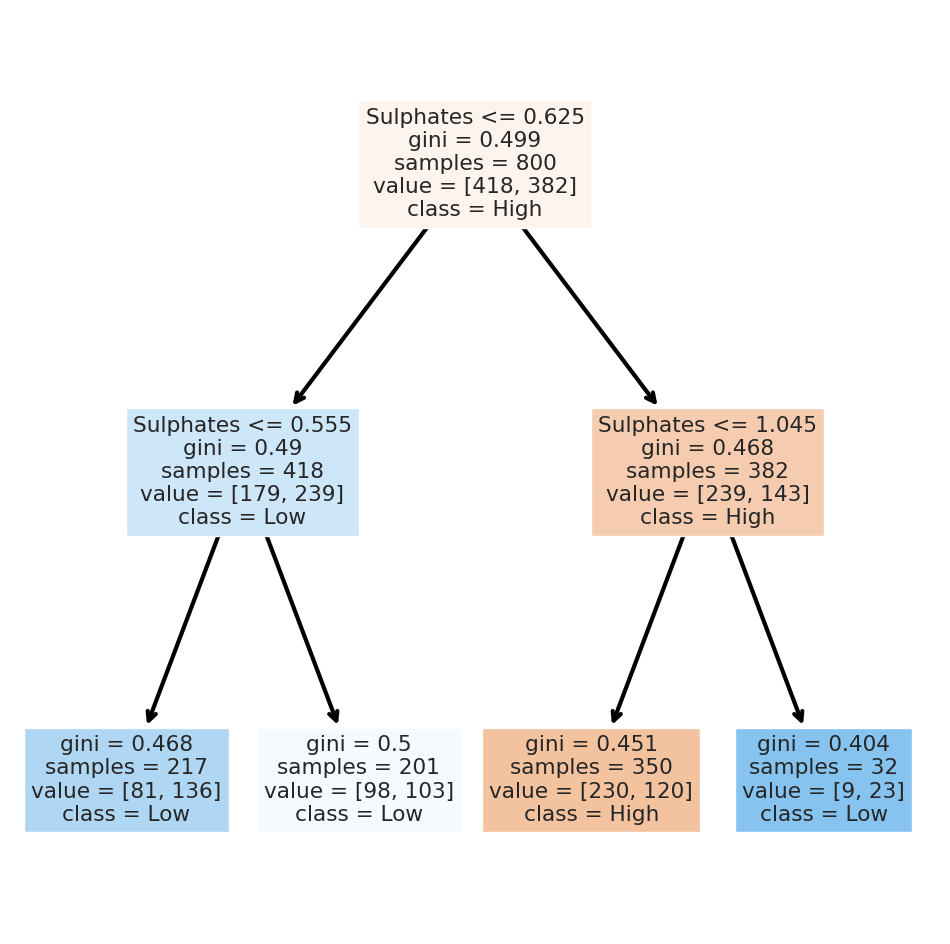

In [43]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train[['Sulphates']], y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train[['Sulphates']])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train[['Sulphates']], y_train))
print()

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train[['Sulphates']].columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

### Problem 2b

Predict the response using each of the three models on both Train and Test data. Print the Confusion Matrix for each model, both for Train and Test datasets. Print the Classification Accuracy for the tree models, on both datasets.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.61

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.535



<Axes: >

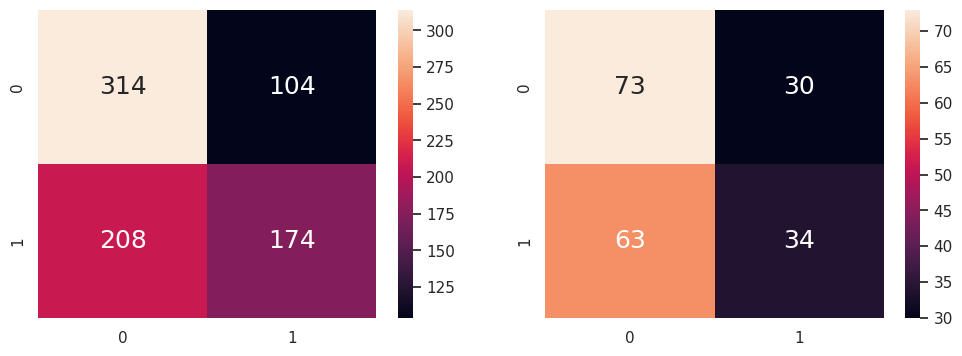

In [44]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train[['CitricAcid']], y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train[['CitricAcid']])
y_test_pred = dectree.predict(X_test[['CitricAcid']])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train[['CitricAcid']], y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test[['CitricAcid']], y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6225

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.59



<Axes: >

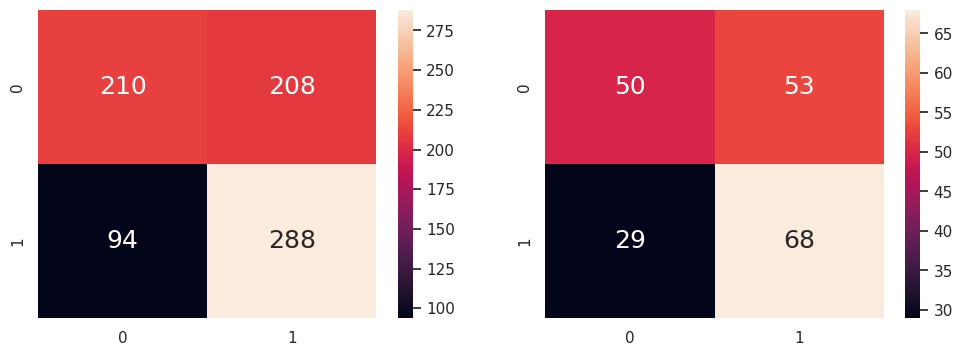

In [45]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train[['Chlorides']], y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train[['Chlorides']])
y_test_pred = dectree.predict(X_test[['Chlorides']])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train[['Chlorides']], y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test[['Chlorides']], y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.615

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.61



<Axes: >

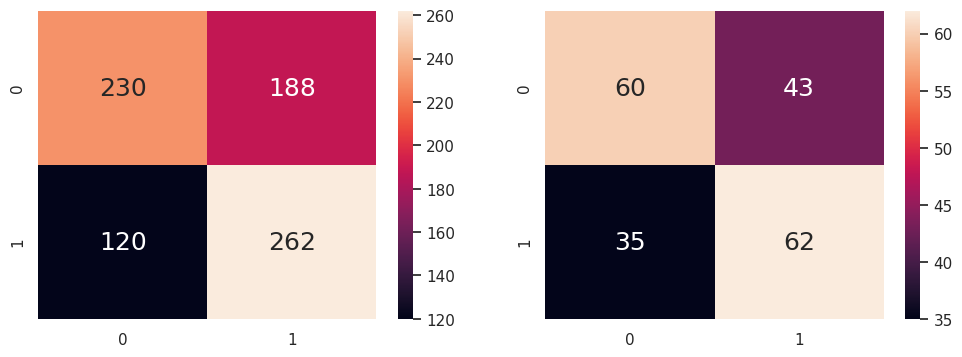

In [46]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train[['Sulphates']], y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train[['Sulphates']])
y_test_pred = dectree.predict(X_test[['Sulphates']])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train[['Sulphates']], y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test[['Sulphates']], y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Problem 2c

Comment : Which of the three uni-variate Decision Trees is the best in prediction? Briefly justify.

Answer: Sulphates. It has the highest train and test classification accuracy. Thus, the most accurate for prediction.

### Problem 3a

Partition the dataset randomly into Train and Test datasets. On the Train set, fit a single multi-variate Decision Tree model for the response against all of the three other numeric variables. 

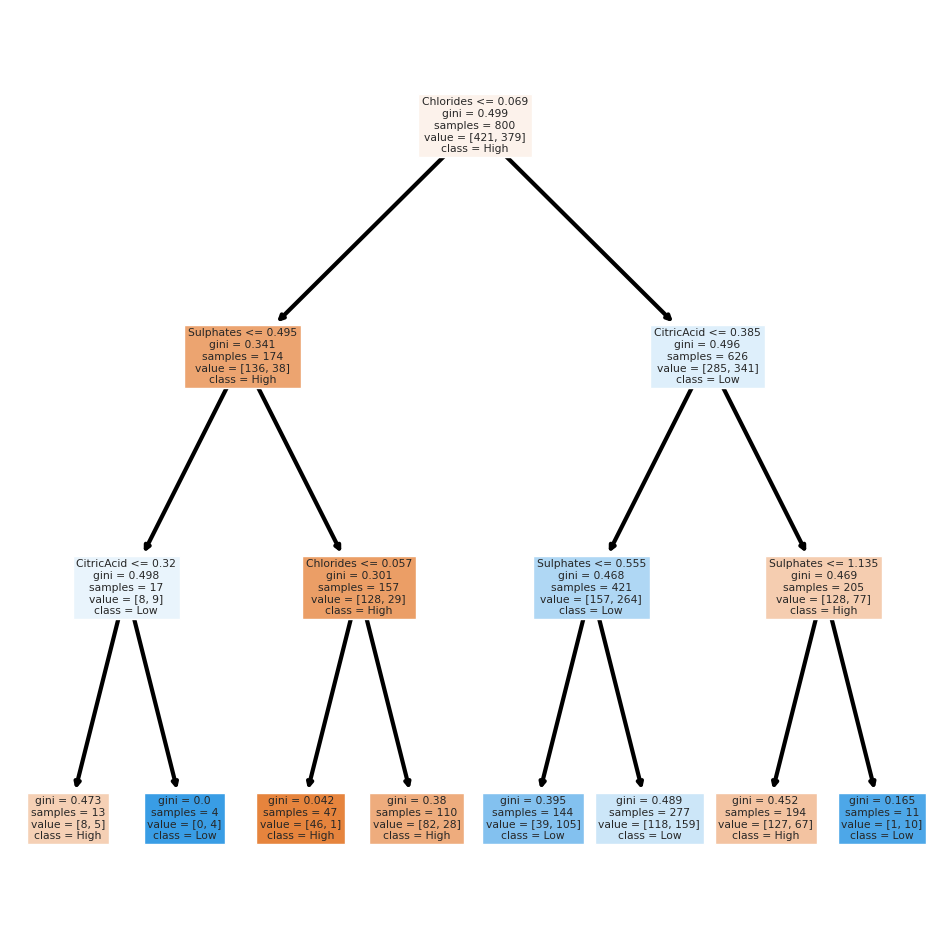

In [47]:
# Extract Response and Predictors
predictors = ["CitricAcid", "Chlorides", "Sulphates"]

y = pd.DataFrame(winesData['Alcohol'])
X = pd.DataFrame(winesData[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

### Problem 3b

Predict the response using this model on both Train and Test datasets. Print the Classification Accuracy in both cases.

In [48]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.67625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.63



### Problem 3c

Fit a deep tree on the same Train data.

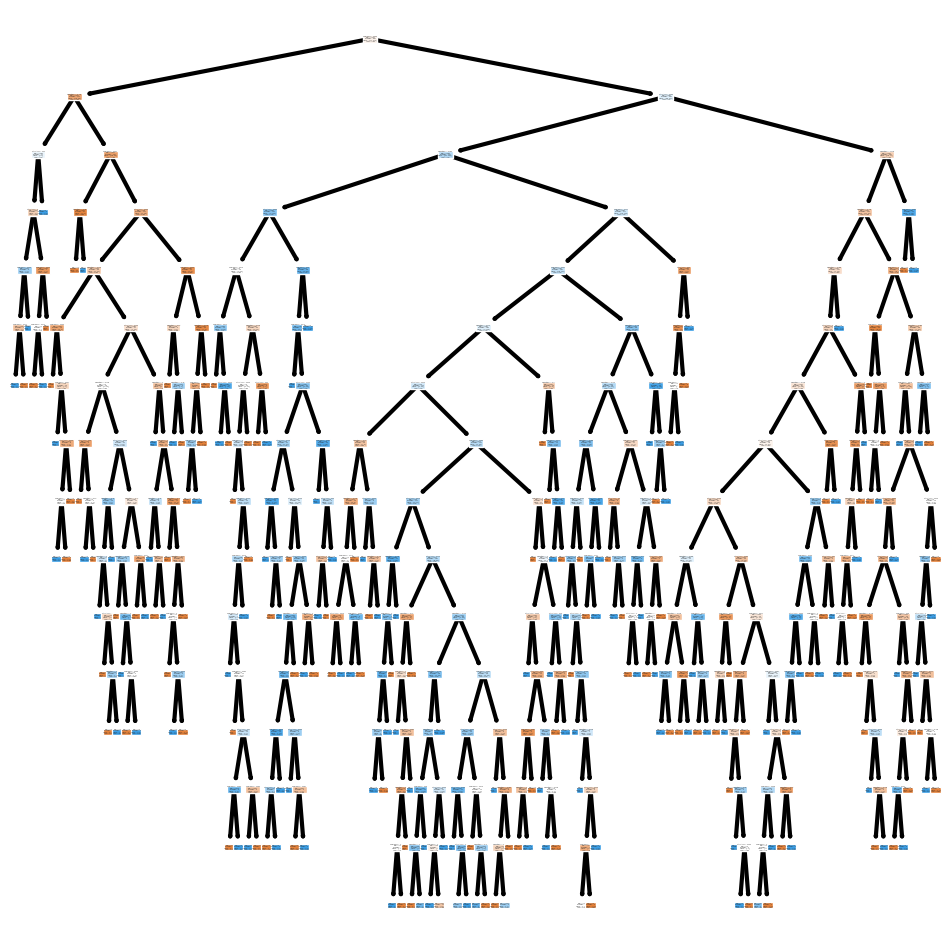

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9825



In [49]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 15)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()


Comment : Is this a better model than 3(a)?

Answer: More depth higher classification accuracy on training set but might not work well with test set.

### Problem 4

Propose two methods to improve the decision tree model even further and implement the code for each method proposed.

In [50]:
# Method 1:

In [51]:
# Method 2: